# Portfolio Calculator

This notebook provides tools to help make informed decisions about buying into a fund, ETF or stock based on some simplified assumptions. Such as:

* the growth rate of the asset 
* expense ratio (how much the fund/asset charges you to hold it)
* periodic contributions you make (eg. how much are you dollar cost averaging in)


In [1]:
# this code loads all the required libraries

import pandas as pd 
import matplotlib.pyplot as plt 

print("libraries loaded successfully")

libraries loaded successfully


In [2]:
def print_series(name, series):
    """
        this function is just used to display the data
        in a tabular format
    """

    print("Portfolio: " + name)
    print("year | portfolio val")
    print("-----+--------------")
    cnt = 0
    divisor = "    | "
    for point in series:
        print(str(cnt) + divisor + str(point))
        cnt = cnt + 1
        if cnt >= 10:
            divisor = "   | "

## Exponential Simulation

The exponential simulation `run_simulation_exponential(p, r, years)` computes 
the growth rate using only the equation for compound interest.
        
Formula for compound interest:

    FV = P(1 + r/n)^(nt)

Where:
	•	FV is the future value or ending balance.
	•	P  is the initial principal amount, which is $100 in your case.
	•	r  is the annual interest rate, which is 10% or 0.10 as a decimal.
	•	n  is the number of times that interest is compounded per year. If it's compounded annually, n would be 1. 
    
If it's compounded semi-annually, n would be 2, and so on.
	•	t is the number of years the money is invested for, which is 5 in your case

In [3]:
def run_simulation_exponential(p, r, years):
    
    # assume compounding happens annually
    n = 1
    
    # fv -> future value of portfolio
    
    fv = p * (1 + r/n)**(n * years)

    print("\n\n**********************************************\n")
    print("value after " + str(years) + " years is: $ %.2f" % fv)
    print("\n**********************************************")
    
    return fv

## Iteration Simulation

The below code will use simplified math (eg no exponents) and a for loop
to get some more fine grained information about what happens each year
to the fund.

Note the iteration simulation has additional parameters like
* 3 different simulations with different growth rates assumptions
    * conservative
    * middle of the road
    * aggressive
* expense ratios to simulate ETF or managed fund expenses which take away from growth
* yearly contributions

In [4]:
def run_simulation_iterative(p, r, years):
    """
        This section initiliazes the different variables
        There are 3 different series
        
        c - conservative
        m - middle road
        a - aggressive
        
        each of the variables in this section are intended to be tweaked
        for the specific scenario in consideration
    """
    
    # these are the growth rates (r -> rate)
    r_conservative = 0.05
    r_middle_road = r   
    r_aggressive = 0.15

    # compounded annually. See the for loop for details
        
    # This is assuming your contributions grow based on annual raises in income
    # to account for this raises are considered as a percentage 0.0 - 1 (0 - 100%)
    yr_raise = 0.00 
    
    # this is the expense ration of the fund/ETF/asset (0.01 -> 1% expense ratio)
    er_c = 0.0
    er_m = 0.01
    er_a = 0.0

    # this is different values for the yearly contributions to the fund
    yr_contrib_c = 0
    yr_contrib_m = 0
    yr_contrib_a = 0
    
    # initialize the starting values for the different simulations
    port_worth_c = p
    port_worth_m = p
    port_worth_m_no_fee = p
    port_worth_a = p

    # initialize arrays to hold the data
    series_c = []
    series_m = []
    series_m_no_fee = []
    series_a = []

    # add the initial value of in the asset/fund to the array
    series_c.append(port_worth_c)
    series_m.append(port_worth_m)
    series_m_no_fee.append(port_worth_m_no_fee)
    series_a.append(port_worth_a)
    
    
    """
        this code loop assumes compound rate (n=1) is equal to one
        
        The algorithm is:
        
            portfolio worth = current-value + yearly-growth + your-contributions
            portfolio worth = new-value - the-expense-ratio
            
            then add the value for that year to the series
    """
    for i in range(0,years):
        port_worth_c = port_worth_c + (port_worth_c * r_conservative) + yr_contrib_c
        port_worth_c = port_worth_c * (1 - er_c)
        series_c.append(port_worth_c)

        port_worth_m = port_worth_m + (port_worth_m * r_middle_road) + yr_contrib_m
        port_worth_m = port_worth_m * (1 - er_m)
        series_m.append(port_worth_m)

        port_worth_m_no_fee = port_worth_m_no_fee + port_worth_m_no_fee * r_middle_road
        port_worth_m_no_fee = port_worth_m_no_fee 
        series_m_no_fee.append(port_worth_m_no_fee)

        port_worth_a = port_worth_a + (port_worth_a * r_aggressive) + yr_contrib_a
        port_worth_a = port_worth_a * (1 - er_a)
        series_a.append(port_worth_a)
        
        yr_contrib_c = yr_contrib_c + yr_contrib_c*yr_raise
        yr_contrib_m = yr_contrib_m + yr_contrib_c*yr_raise
        yr_contrib_a = yr_contrib_a + yr_contrib_c*yr_raise

        
    """
        Display all the final values of the different projections
    """
    print("")
    print("Value of the portfolios after " + str(years) + " years:")
    print("------------------------------------")    
    print("  conservative: $" + '{:,}'.format(port_worth_c))
    print("  median:       $" + '{:,}'.format(port_worth_m))
    print("  median no fee $" + '{:,}'.format(port_worth_m_no_fee))
    print("  aggressive:   $" + '{:,}'.format(port_worth_a))

    
    """
        Show how much these projections grew over the time period
        in terms of percentages
    """
    print("\n")
    print("Growth percentages")
    print("------------------")

    median_percentage = ((port_worth_m - p)/p)*100
    median_percentage_no_fee = ((port_worth_m_no_fee - p)/p)*100
    
    print("change median:        %.2f" % median_percentage)
    print("change median no fee  %.2f" % median_percentage_no_fee)
    
    
    """
        display the actual values per year
    """
    print("\n")
    print("Series values:")
    print_series("middle road", series_m)
    print("")
    print_series("middle road no fee", series_m_no_fee)

    
    """
        setup and plot the graph
    """
    print("\n")
    g_c = pd.Series(series_c)
    g_m = pd.Series(series_m)
    g_m_no_fee = pd.Series(series_m_no_fee)
    g_a = pd.Series(series_a)
    
    plt.rcParams['figure.figsize'] = [15, 9]
    plt.title("Plot of all the projections. One data point per year")
    plt.xlabel("years")
    plt.ylabel("value in $")
    g_c.plot()
    g_m.plot()
    g_m_no_fee.plot()
    g_a.plot()

    # control the size of the ploy
    plt.show() 
    
    return port_worth_m_no_fee

## Set the variables

set the variables that will be used in the simulations

In [5]:
# starting amount of the fund
principal = 100

growth_rate = 0.1

# number of years to run the simulation
years = 5

## Run the iterative simulation


Value of the portfolios after 5 years:
------------------------------------
  conservative: $127.62815624999999
  median:       $153.15789852644485
  median no fee $161.051
  aggressive:   $201.13571875


Growth percentages
------------------
change median:        53.16
change median no fee  61.05


Series values:
Portfolio: middle road
year | portfolio val
-----+--------------
0    | 100
1    | 108.9
2    | 118.5921
3    | 129.1467969
4    | 140.64086182409997
5    | 153.15789852644485

Portfolio: middle road no fee
year | portfolio val
-----+--------------
0    | 100
1    | 110.0
2    | 121.0
3    | 133.1
4    | 146.41
5    | 161.051




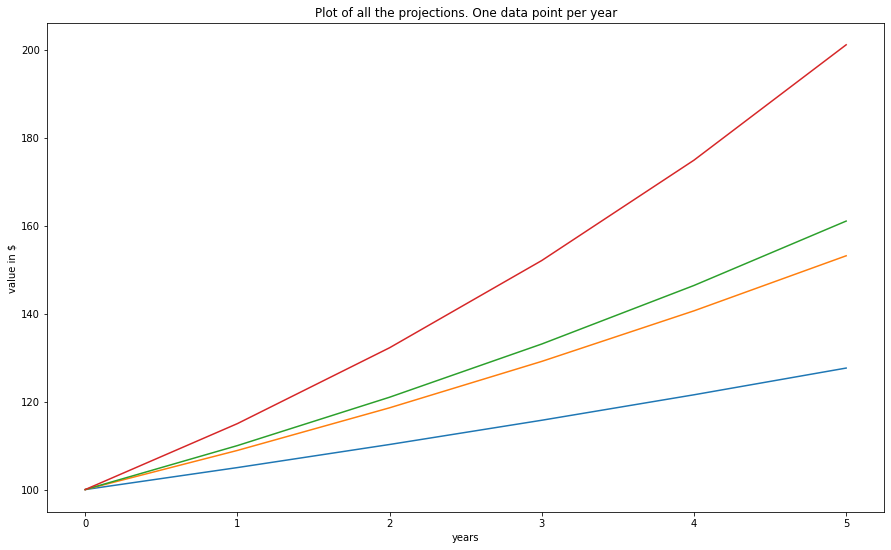

In [6]:
fv_itr = run_simulation_iterative(principal, growth_rate, years)

## Run the exponential Simulation

In [7]:
fv_exp = run_simulation_exponential(principal, growth_rate, years)



**********************************************

value after 5 years is: $ 161.05

**********************************************


## Check the values are equal

The middle of the road iterative solution and the exponential solution both only consider the growth rate of the fund so they should be equivalent. This code just makes sure that is the case.

In [8]:
fv_itr = round(fv_itr, 2)
fv_exp = round(fv_exp, 2)

assert fv_itr == fv_exp

print("Success!\nBoth iterative and exponential simulations are equal!")

Success!
Both iterative and exponential simulations are equal!
